In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Homework 1
## INFO 4871 / 5871
## Payoj Jain

The purpose of this assignment is gain experience working with user profile data as commonly found in recommender systems. 

### Hints

The following functions of the Pandas API are worth refreshing your memory on:

- `read_csv`
- `DataFrame.groupby`
- `DataFrame.query`
- `DataFrame.join`
- `DataFrame.crosstab`

Also, the sections of the Pandas documentation on "Indexing and Selecting Data" and "Group By: split-apply-combine".

### More hints
The third-ranked item produced by each recommender should be:

- `PopFreq`: _Forrest Gump_
- `PopFreq` (Filtered): _Lord of the Rings: Fellowship of the Ring_
- `PopRating`: _Touch of Evil_
- `PopRating` (Filtered): _Fight Club_

## Step 1
Load the MovieLens data. There are three files: ratings.csv, movies.csv, tags.csv. Note: the files use "Latin 1" encoding. You'll need to include this information in the call to `read_csv`. Use the `head()` function to show the contents of each data frame after you read it. Hint: Your life will be easier later if you use `movies.set_index('movieId')` to set the index of the `movies` data frame to be the movie id. 

In [2]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,12882,1,4.0,1147195252
1,12882,32,3.5,1147195307
2,12882,47,5.0,1147195343
3,12882,50,5.0,1147185499
4,12882,110,4.5,1147195239


In [4]:
tags = pd.read_csv("tags.csv", encoding="Latin 1")
tags.head()
# len(tags)

,movieId,userId,tag,timestamp
0,3916,12882,sports,1147195545
1,4085,12882,Eddie Murphy,1147195966
2,33660,12882,boxing,1147195514
3,1197,320,must show,1145964801
4,1396,320,must show,1145964810


## Step 2

- Compute a rating count data frame: for each movie, how many times has it been rated? (Value of the rating doesn't count)
- Compute the minimum value. Identify the name of a movie that has this minimum count? INFO 5871: (optional for INFO 4871: No hard-coded values.)
- Compute the maximum value. Identify the name of a movie that has the maximum count? INFO 5871: (optional for INFO 4871: No hard-coded values.)
- Plot the rating count distribution as a histogram.


### Create the rating count data frame

In [5]:
rating_count = pd.DataFrame(ratings.groupby(['movieId']).count()['rating'])
rating_count = rating_count.rename(columns={'rating': 'movie_rating_count'})
rating_count.head()

,movie_rating_count
movieId,
1,496
2,279
3,78
4,13
5,76


### Minimum rated movie
Hard-coded method

In [6]:
min_count = rating_count['movie_rating_count'].min()
min_count

3

In [7]:
min_count_movie = rating_count.query('movie_rating_count == 3')
min_count_movie

,movie_rating_count
movieId,
340,3


In [8]:
movie_title = movies.query('movieId == 340')

print("The movie rated " +str(min_count)+" times is "+str(movie_title['title'].values[0]))

The movie rated 3 times is War, The (1994)


Non-hard-coded method

In [9]:
min_movieId = rating_count[rating_count['movie_rating_count'] == rating_count.min()[0]]

In [10]:
movie = movies[movies['movieId'] == min_movieId.index[0]]
print("The movie rated " +str(min_movieId['movie_rating_count'].values[0])+" times is "+str(movie['title'].values[0]))

The movie rated 3 times is War, The (1994)


Alternative using inner join

In [11]:
minMovie = min_movieId.join(movies.set_index('movieId'), on='movieId', how='inner')
print("The movie rated " +str(minMovie['movie_rating_count'].values[0])+" times is "+str(minMovie['title'].values[0]))

The movie rated 3 times is War, The (1994)


### Most-rated movie
Hard-coded method

In [12]:
max_count = rating_count['movie_rating_count'].max()
max_count

668

In [13]:
max_movie_count = rating_count.query('movie_rating_count == 668')
max_movie_count

,movie_rating_count
movieId,
2571,668


In [14]:
movie_title = movies.query('movieId == 2571')
print("The movie rated " +str(max_count)+" times is "+str(movie_title['title'].values[0]))

The movie rated 668 times is Matrix, The (1999)


Non-hard-coded method (join)

In [15]:
max_movieId = rating_count[rating_count['movie_rating_count'] == rating_count.max()[0]]

In [16]:
maxMovie = max_movieId.join(movies.set_index('movieId'), on='movieId', how='inner')
print("The movie rated " +str(maxMovie['movie_rating_count'].values[0])+" times is "+str(maxMovie['title'].values[0]))

The movie rated 668 times is Matrix, The (1999)


Histogram. (Use bins of size 50.)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1131231d0>]], dtype=object)

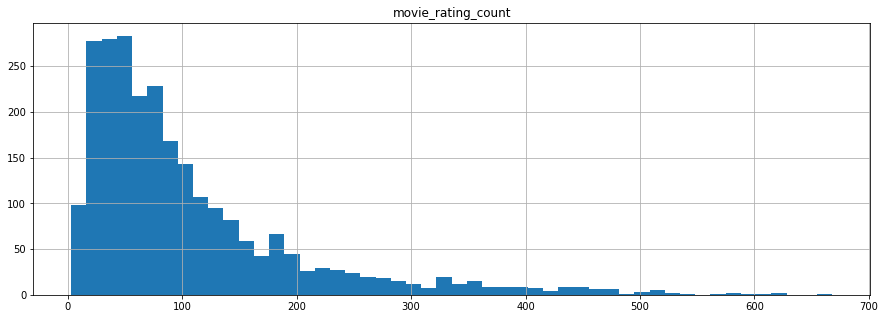

In [17]:
rating_count.hist(bins=50, figsize=(15,5))

## Step 3

- Compute the rating value distribution: for each possible rating value (0.5, 1,1.5,2.0,2.5, ..., 4.5, 5.0), how many movies have that rating?
- Plot the rating value distribution as a line plot

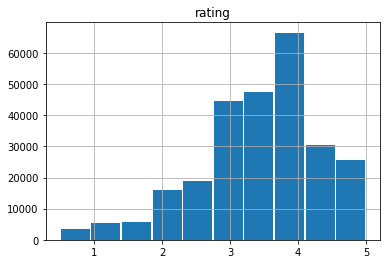

In [18]:
ratings.hist(column = 'rating', bins = 10, rwidth = 0.95)
rating_count = pd.DataFrame(ratings.groupby(['rating']).count()['movieId'])
rating_count = rating_count.rename(columns={'movieId': 'count'})
# rating_count

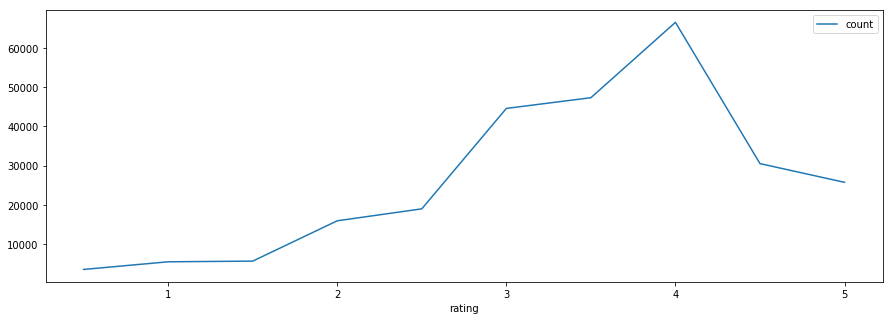

In [19]:
rating_count.plot.line(figsize=(15,5))
# rating_count.plot.bar(figsize=(15,5))

### _Question:_ What does this distribution tell you about the kind of preferences represented in the MovieLens data set?

>_Answer:_ (max 50 words) 
- This represents that the data set is biased. It contains highly rated movies (>=3) rated by over 100k people while movies which are badly rated (<=2.5) have a cummulative count of less than 60k.  
- More importantly, this also tells that most people have similar taste in movies. This means if a person likes a movie and rates it 4 or above then that movie is highly likely to be loved by other users.  
- This also tells that in general most people rate movies which they like.

## Step 4

- Compute the profile length distribution: for each user, how many ratings have they contributed?
- Compute the minimum value. Identify the id of the user that has this minimum count?
- Compute the maximum value. Identify the id of the user that has the maximum count?
- Plot the profile length distribution as a histogram.


### Create the profile length data frame

In [20]:
user_count= pd.DataFrame(ratings.groupby(['userId']).count()['movieId'])
user_count = user_count.rename(columns={'movieId': 'user_rating_count'})
user_count.head()

,user_rating_count
userId,
316,129
320,62
359,833
370,411
910,677


Hard-coded

In [21]:
min_count = user_count['user_rating_count'].min()
print('Minumum rating count =', min_count)

min_rating_user_id = user_count.query('user_rating_count == 14').index[0]
print('User id with minimum rating:', min_rating_user_id)

Minumum rating count = 14
User id with minimum rating: 138176


In [22]:
max_count = user_count['user_rating_count'].max()
print('Maximum rating count =', max_count)

max_rating_user_id = user_count.query('user_rating_count == 1900').index[0]
print('User id with maximum rating:', max_rating_user_id)

Maximum rating count = 1900
User id with maximum rating: 76630


Non-hard-coded

User id with minimum rating: 138176
User id with maximum rating: 76630


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113b60470>]], dtype=object)

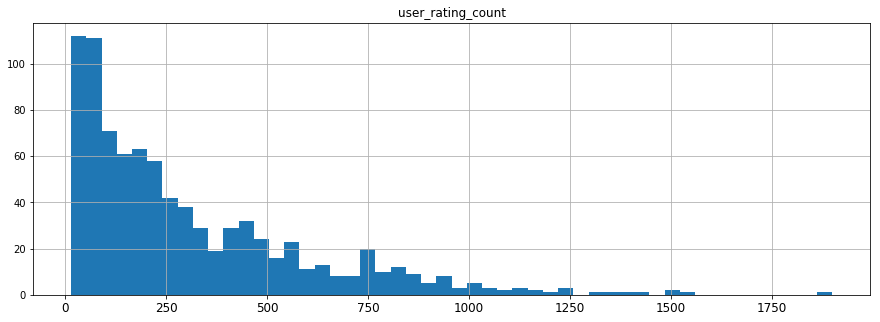

In [23]:
min_user_count = user_count[user_count['user_rating_count'] == user_count.min()[0]]
max_user_count = user_count[user_count['user_rating_count'] == user_count.max()[0]]

print('User id with minimum rating:', min_user_count.index[0])
print('User id with maximum rating:', max_user_count.index[0])

user_count.hist(bins=50, xlabelsize=12, figsize=(15,5))

## Step 5
Build a non-personalized popularity-based top 20 recommender. Ignore the value of the rating and just count how many times a movie appears in someone's ratings. We will call this `PopFreq`.

Can re-use some of the results from above. Sort in descending order

In [24]:
rating_count = pd.DataFrame(ratings.groupby(['movieId']).count()['rating'])
rating_count = rating_count.rename(columns={'rating': 'movie_rating_count'})
PopFreq = rating_count.sort_values(by="movie_rating_count", ascending = False).head(20)
PopFreq.head(20)

,movie_rating_count
movieId,
2571,668
4993,628
356,621
296,613
5952,597
2959,588
7153,577
318,564
260,535


Join against the movie table to see what movies these are.

In [25]:
PopFreq.join(movies.set_index('movieId'), on='movieId', how='inner').head(20)

,movie_rating_count,title,genres
movieId,,,
2571,668,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4993,628,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
356,621,Forrest Gump (1994),Comedy|Drama|Romance|War
296,613,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
5952,597,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
2959,588,Fight Club (1999),Action|Crime|Drama|Thriller
7153,577,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
318,564,"Shawshank Redemption, The (1994)",Crime|Drama
260,535,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


## Step 5.5 (INFO 5871 only)
Build a filtered version of `PopFreq` in which ratings below 4 are filtered out. Hint: the `DataFrame.query` function is handy for this.

In [26]:
filtered_rating = ratings.query("rating >= 4.0")
filtered_rating_count = pd.DataFrame(filtered_rating.groupby(['movieId']).count()['rating'])
PopFreq = filtered_rating_count.sort_values(by="rating", ascending = False).head(20)
PopFreq.join(movies.set_index('movieId'), on='movieId', how='inner')

,rating,title,genres
movieId,,,
2571,522,"Matrix, The (1999)",Action|Sci-Fi|Thriller
296,491,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4993,483,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
318,477,"Shawshank Redemption, The (1994)",Crime|Drama
2959,470,Fight Club (1999),Action|Crime|Drama|Thriller
5952,432,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
7153,426,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
356,412,Forrest Gump (1994),Comedy|Drama|Romance|War
260,397,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


### _Question:_ What movie no longer appears in the top 10 after filtering by rating value? What must be true of this movie for this to be the case?

> _Answer_: (max 50 words) **Silence of the Lambs.**   
- Movies which are in the top 10 have been rated 4.0 or greater more than Silence of the Lambs even though the total number of ratings for Silence of the Lambs maybe more than those in the top 10. 

## Step 6
Build non-peraonalized recommender that orders the movies by average rating. We will call this version `PopRating`.

In [27]:
PopRating = ratings.groupby('movieId')['rating'].mean()
PopRating = PopRating.reset_index(name='avgRating')
PopRating = PopRating.sort_values(by ='avgRating', ascending=False)

In [28]:
PopRating.join(movies.set_index('movieId'), on='movieId').head(20)

,movieId,avgRating,title,genres
189,318,4.364362,"Shawshank Redemption, The (1994)",Crime|Drama
422,858,4.315848,"Godfather, The (1972)",Crime|Drama
632,1248,4.259259,Touch of Evil (1958),Crime|Film-Noir|Thriller
1355,2959,4.258503,Fight Club (1999),Action|Crime|Drama|Thriller
2110,7502,4.247423,Band of Brothers (2001),Action|Drama|War
591,1203,4.246032,12 Angry Men (1957),Drama
1317,2859,4.220000,Stop Making Sense (1984),Documentary|Musical
608,1221,4.218462,"Godfather: Part II, The (1974)",Crime|Drama
176,296,4.217781,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1210,2571,4.195359,"Matrix, The (1999)",Action|Sci-Fi|Thriller


### _Question:_ This list is quite different from the `PopFreq` list. What must be true of "The Godfather" for it to appear on this list, but not the other one?

> _Answer:_ (max 50 words)  
The total number of ratings for "The Godfather" is not enough to appear in PopFreq list. In other words "The Godfather" is not as popular as the movies in PopFreq.  
But having high average rating suggests that most of the people who rated "The Godfather" have given it a very high rating. 

## Step 6.5 (INFO 5871 only)
Build a version of `PopRating` that drops movies that have been rated less than 100 times

- Do frequency table
- Filter out the movies with fewer than 100 ratings
- Join with `means`
- Sort this

In [29]:
filtered_rating_count = rating_count.query('movie_rating_count >= 100')

In [30]:
filtered_PopRating = filtered_rating_count.join(PopRating.set_index('movieId'), on = 'movieId')

In [31]:
PopRating = filtered_PopRating.sort_values(by='avgRating', ascending=False)
PopRating = PopRating.join(movies.set_index('movieId'), on = 'movieId')

In [32]:
PopRating

,movie_rating_count,avgRating,title,genres
movieId,,,,
318,564,4.364362,"Shawshank Redemption, The (1994)",Crime|Drama
858,448,4.315848,"Godfather, The (1972)",Crime|Drama
2959,588,4.258503,Fight Club (1999),Action|Crime|Drama|Thriller
1203,189,4.246032,12 Angry Men (1957),Drama
1221,325,4.218462,"Godfather: Part II, The (1974)",Crime|Drama
296,613,4.217781,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2571,668,4.195359,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4226,483,4.194617,Memento (2000),Mystery|Thriller
2019,172,4.191860,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama


### _Question:_ Compare this list with `PopRating` and identify a movie that no longer appears in the top 10? What movie is it? What must be true of this movie for this to be the case?

> _Answer_: (max 50 words)  
**Touch of Evil, Band of Brothers and Stop Making Sense** are three movies which no longer appear in the filtered list but were there in PopRating. This suggests that total number of ratings for this movie is less than 100 but most of the users who rated this movie have given it a high score